In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
train_data=pd.read_csv('train.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
len(train_data)

891

In [36]:
train_data.drop(columns='Cabin',inplace=True)

In [37]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
train_data.select_dtypes(include=['number']).corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [39]:
train_data.duplicated().sum()

0

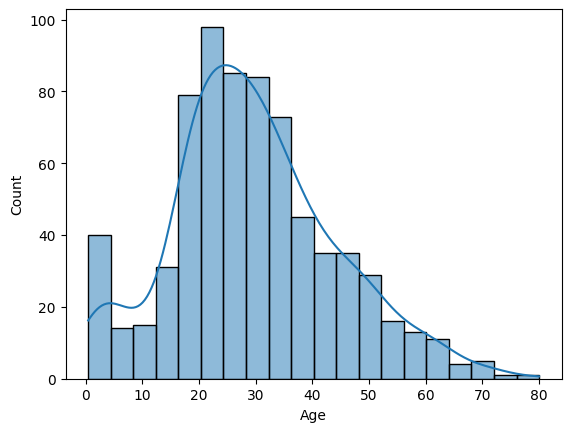

In [40]:
sns.histplot(train_data['Age'],kde=True)
plt.show()

In [41]:
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_2444\127112235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(),inplace=True)


In [42]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

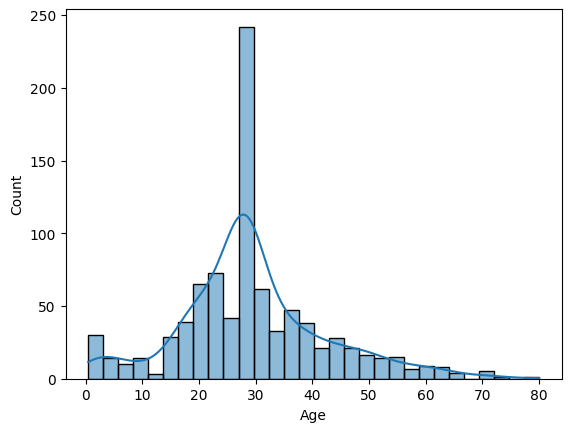

In [43]:
sns.histplot(train_data['Age'],kde=True)
plt.show()

In [44]:
train_data.dropna(subset='Embarked',inplace =True)

In [45]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [46]:
train_data.drop(columns=['Name','Ticket'],inplace =True)

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
train_data['Sex']=le.fit_transform(train_data['Sex'])

In [49]:
train_data=pd.get_dummies(train_data,columns=['Embarked'],drop_first=True)

In [50]:
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True
5,6,0,3,1,28.0,0,0,8.4583,True,False
6,7,0,1,1,54.0,0,0,51.8625,False,True
7,8,0,3,1,2.0,3,1,21.0750,False,True
8,9,1,3,0,27.0,0,2,11.1333,False,True
9,10,1,2,0,14.0,1,0,30.0708,False,False


In [51]:
len(train_data)

889

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X=train_data[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']]
y=train_data['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

#  RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [56]:
rf=RandomForestClassifier(max_depth=6)
rf.fit(X_train_scaled,y_train)
y_predict_rf=rf.predict(X_test_scaled)
print(y_predict_rf)

[0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1]


In [57]:
cm_rf=confusion_matrix(y_test,y_predict_rf)
ac_rf=accuracy_score(y_test,y_predict_rf)
f1_rf=f1_score(y_test,y_predict_rf,average='weighted')
cf_rf=classification_report(y_test,y_predict_rf)
print(cm_rf)
print(ac_rf)
print(f1_rf)
print(cf_rf)

[[96 13]
 [19 50]]
0.8202247191011236
0.8185466219174085
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       109
           1       0.79      0.72      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178



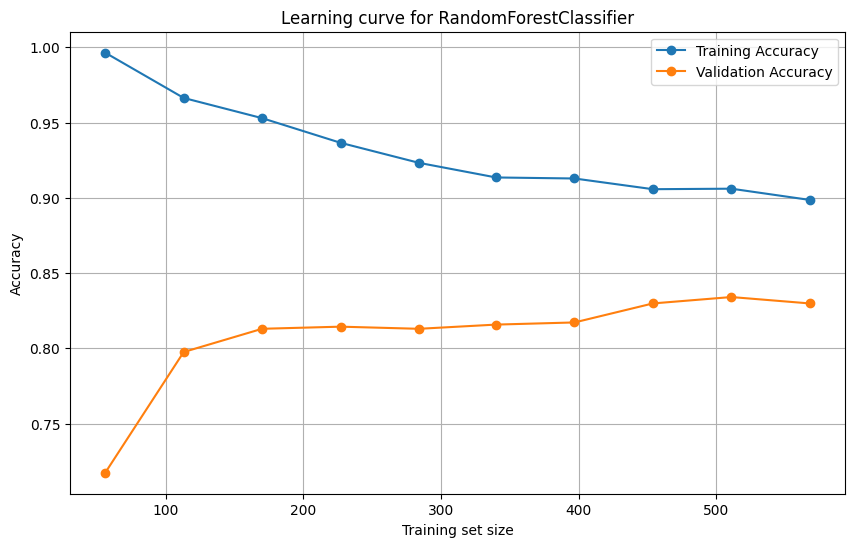

In [58]:
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(
    estimator=rf,
    X=X_train_scaled,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes,train_mean,'o-',label='Training Accuracy')
plt.plot(train_sizes,test_mean,'o-',label='Validation Accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning curve for RandomForestClassifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# SVC

In [59]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_scaled,y_train)
y_predict_svc=svc.predict(X_test_scaled)


In [60]:
cm_svc=confusion_matrix(y_test,y_predict_svc)
ac_svc=accuracy_score(y_test,y_predict_svc)
f1_svc=f1_score(y_test,y_predict_svc,average='weighted')
cf_svc=classification_report(y_test,y_predict_svc)
print(cm_svc)
print(ac_svc)
print(f1_svc)
print(cf_svc)

[[92 17]
 [18 51]]
0.8033707865168539
0.8031020867950658
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.74      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [62]:
knn.fit(X_train_scaled,y_train)
y_predict_knn=knn.predict(X_test_scaled)
y_predict_knn

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [63]:
cm_knn=confusion_matrix(y_test,y_predict_knn)
ac_knn=accuracy_score(y_test,y_predict_knn)
f1_knn=f1_score(y_test,y_predict_knn,average='weighted')
cf_knn=classification_report(y_test,y_predict_knn)
print(cm_knn)
print(ac_knn)
print(f1_knn)
print(cf_knn)

[[90 19]
 [18 51]]
0.7921348314606742
0.7924035958930262
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.73      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



# Ensembling ALL

In [64]:
from sklearn.ensemble import VotingClassifier
rf=RandomForestClassifier(max_depth=6,random_state=42)
svc=SVC(probability=True,kernel='rbf',C=1)
knn=KNeighborsClassifier(n_neighbors=5)

In [65]:
voting_clf=VotingClassifier(
    estimators=[
        ('rf',rf),
        ('svc',svc),
        ('knn',knn)
    ],
    voting='soft'
)

In [66]:
voting_clf.fit(X_train_scaled,y_train)
y_predict_ens=voting_clf.predict(X_test_scaled)
y_predict_ens

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [67]:
cm_ens=confusion_matrix(y_test,y_predict_ens)
ac_ens=accuracy_score(y_test,y_predict_ens)
f1_ens=f1_score(y_test,y_predict_ens,average='weighted')
cf_ens=classification_report(y_test,y_predict_ens)
print(cm_ens)
print(ac_ens)
print(f1_ens)
print(cf_ens)

[[93 16]
 [19 50]]
0.8033707865168539
0.8025206048999836
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       109
           1       0.76      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



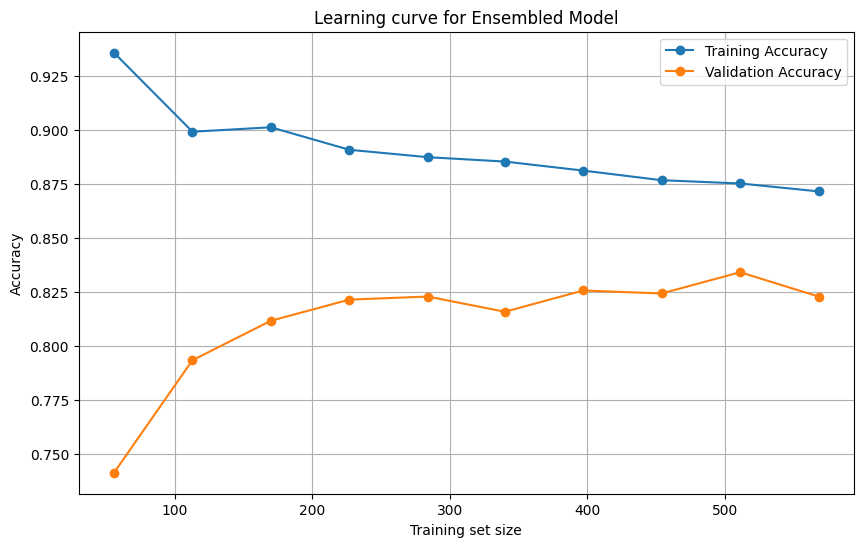

In [68]:
train_sizes,train_scores,test_scores=learning_curve(
    estimator=voting_clf,
    X=X_train_scaled,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes,train_mean,'o-',label='Training Accuracy')
plt.plot(train_sizes,test_mean,'o-',label='Validation Accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning curve for Ensembled Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [70]:
test_data=pd.read_csv('test.csv')

In [71]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
test_data.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [73]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [74]:
test_data['Age'].fillna(test_data['Age'].median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_2444\3330545753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(),inplace=True)


In [75]:
test_data.dropna(subset='Fare',inplace=True)

In [76]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [77]:
test_data['Sex']=le.fit_transform(test_data['Sex'])
test_data=pd.get_dummies(test_data,columns=['Embarked'],drop_first=True)

In [78]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,True,False
1,893,3,0,47.0,1,0,7.0000,False,True
2,894,2,1,62.0,0,0,9.6875,True,False
3,895,3,1,27.0,0,0,8.6625,False,True
4,896,3,0,22.0,1,1,12.2875,False,True


In [79]:
test_data_scaled=sc.transform(test_data)

In [80]:
Final_prediction=voting_clf.predict(test_data_scaled)
Final_prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [81]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': Final_prediction.astype(int)
})

In [82]:
submission.to_csv('submission.csv', index=False)
